###**Install Module**

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import community
import seaborn as sns
import warnings
import re
warnings.filterwarnings("ignore")

In [ ]:
# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [46.8 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,194 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,466 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,274 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1,420 kB]
Hit:13 https://ppa.l

install module untuk melakukan crawl data twitter

###**2. Crawl Data Twitter**

In [ ]:
# Crawl Data

filename = 'boikot.csv'
search_keyword = 'Boikot until:2023-03-01 since:2022-03-01 min_faves:200 lang:id'
limit = 200
!npx --yes tweet-harvest@latest -o "{filename}" -s "{search_keyword}" -l {limit} --token ""


Welcome to the Twitter Crawler 🕷️

This script uses Chromium Browser to crawl data from Twitter with *your* Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.

? What's your Twitter auth token? › 78? What's your Twitter auth token? › *78? What's your Twitter auth token? › **78? What's your Twitter auth token? › ***78? What's your Twitter auth token? › ****78? What's your Twitter auth token? › *****78? What's your Twitter auth token? › ******78? What's your Twitter auth token? › *******78? What's your Twitter auth token? › ********78? What's your Twitter auth token? › *********78? What's your Twitter auth token? › **********78? What's your Twitter auth token? › ***********78? What's your Twitter auth token? › ************78? What's your Twitter auth token? › *************78? What's your Twitter auth token? › **********

'boikot until:2023-03-01 since:2022-03-01 min_faves:200 lang:id'

- boikot adalah hastag atau topik yang ingin digunakan
- until:2023-03-01 since:2022-03-01 adalah tanggal postnya
- min_faves:200 minimal likenya adalah 200
- limit : batas crawl data yang ingin diambil
- lang adalah bahasa yang digunakan

###**3. Melakukan Preprocesing Data**

In [ ]:
# Specify the path to your CSV file
file_path = f"tweets-data/{filename}"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter=";")

# Display the DataFrame
df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Tue Feb 21 09:07:14 +0000 2023,1627958110202761217,"Seperti yg kita duga, 5 menit Sold Out. Jangan...",25,10,581,1013,in,1281158096782454786,1627958110202761217,ailovegyu,https://twitter.com/ailovegyu/status/162795811...
1,Tue Feb 21 04:05:38 +0000 2023,1627882213189775361,"2024 khusus di Aceh, untuk DPR RI, jangan ada ...",14,144,386,1524,in,1472574920508903425,1627882213189775361,Shalihin_NAD,https://twitter.com/Shalihin_NAD/status/162788...
2,Mon Feb 20 20:42:02 +0000 2023,1627770577409937408,@NabellaAnuar Ok la i nak boikot produk ni sbb...,5,15,119,613,in,1460115024,1627642488520429568,katyyayaa,https://twitter.com/katyyayaa/status/162777057...
3,Sat Feb 18 12:15:23 +0000 2023,1626918297777352704,@tanyakanrl film kaya gini harusnya di boikot ...,5,10,55,834,in,1472855461900603493,1626910659106734081,kaidrizzle,https://twitter.com/kaidrizzle/status/16269182...
4,Sat Feb 18 04:05:11 +0000 2023,1626794936162205697,Kieda kieda what is this behaviour? Sebab or...,790,129,1941,4227,in,432319461,1626794936162205697,azmieydaud,https://twitter.com/azmieydaud/status/16267949...


menampilkan data yang telah di mining dari twitter

4. Membuat colum username yang berasal dari hasil mention pada hasil column full text

In [ ]:
pola = r'@([A-Za-z0-9_]+)'
def bersihkan_teks(teks):
    usernames = re.findall(pola, teks)
    return ', '.join(usernames)

In [ ]:
df['mention_username'] = df['full_text'].apply(bersihkan_teks)


In [ ]:
df['mention_username'] = df['mention_username'].fillna('')

In [ ]:
df.to_csv('boikot_clean.csv', index=False)

In [ ]:
df2 = pd.read_csv('boikot_clean.csv')  # Ganti 'nama_file_hasil.csv' dengan nama file output yang sesuai

In [ ]:
df2.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,mention_username
0,Tue Feb 21 09:07:14 +0000 2023,1627958110202761217,"Seperti yg kita duga, 5 menit Sold Out. Jangan...",25,10,581,1013,in,1281158096782454786,1627958110202761217,ailovegyu,https://twitter.com/ailovegyu/status/162795811...,NaN
1,Tue Feb 21 04:05:38 +0000 2023,1627882213189775361,"2024 khusus di Aceh, untuk DPR RI, jangan ada ...",14,144,386,1524,in,1472574920508903425,1627882213189775361,Shalihin_NAD,https://twitter.com/Shalihin_NAD/status/162788...,"Gerindra, NasDem, PDemokrat, PKSejahtera, CutS..."
2,Mon Feb 20 20:42:02 +0000 2023,1627770577409937408,@NabellaAnuar Ok la i nak boikot produk ni sbb...,5,15,119,613,in,1460115024,1627642488520429568,katyyayaa,https://twitter.com/katyyayaa/status/162777057...,NabellaAnuar
3,Sat Feb 18 12:15:23 +0000 2023,1626918297777352704,@tanyakanrl film kaya gini harusnya di boikot ...,5,10,55,834,in,1472855461900603493,1626910659106734081,kaidrizzle,https://twitter.com/kaidrizzle/status/16269182...,tanyakanrl
4,Sat Feb 18 04:05:11 +0000 2023,1626794936162205697,Kieda kieda what is this behaviour? Sebab or...,790,129,1941,4227,in,432319461,1626794936162205697,azmieydaud,https://twitter.com/azmieydaud/status/16267949...,NaN


membuat column baru yaitu column mention_username

5. Melakukan cleaning data untuk menghapus data yang mengandung kata NaN pada mention_username

In [ ]:
df_tweets = df2.dropna(subset=['mention_username'])

In [ ]:
df_tweets

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,mention_username
1,Tue Feb 21 04:05:38 +0000 2023,1627882213189775361,"2024 khusus di Aceh, untuk DPR RI, jangan ada ...",14,144,386,1524,in,1472574920508903425,1627882213189775361,Shalihin_NAD,https://twitter.com/Shalihin_NAD/status/162788...,"Gerindra, NasDem, PDemokrat, PKSejahtera, CutS..."
2,Mon Feb 20 20:42:02 +0000 2023,1627770577409937408,@NabellaAnuar Ok la i nak boikot produk ni sbb...,5,15,119,613,in,1460115024,1627642488520429568,katyyayaa,https://twitter.com/katyyayaa/status/162777057...,NabellaAnuar
3,Sat Feb 18 12:15:23 +0000 2023,1626918297777352704,@tanyakanrl film kaya gini harusnya di boikot ...,5,10,55,834,in,1472855461900603493,1626910659106734081,kaidrizzle,https://twitter.com/kaidrizzle/status/16269182...,tanyakanrl
8,Tue Jan 31 05:08:16 +0000 2023,1620287829166403584,"@La_FarEast Rafizi yang suruh kalau mahal, boi...",13,8,350,1188,in,95362459,1620234549832843264,karimbachik,https://twitter.com/karimbachik/status/1620287...,La_FarEast
15,Wed Jan 25 08:46:55 +0000 2023,1618168525264416768,@hanafiEzu Beli dan gunting? Aish. Aku ingatka...,5,9,389,1701,in,294390677,1617829844460646401,Zagreyb,https://twitter.com/Zagreyb/status/16181685252...,hanafiEzu
18,Tue Jan 24 03:58:30 +0000 2023,1617733558067658753,@razlanrafii Sembang la nk boikot. Nanti ada P...,1,3,58,918,in,403141734,1617703949687218178,idzqarromlan,https://twitter.com/idzqarromlan/status/161773...,razlanrafii
20,Sat Jan 14 05:47:03 +0000 2023,1614136994627739650,@kegblgnunfaedh kemarin yg diundang orang aneh...,8,89,309,7003,in,1907507726,1614115839510470656,rezhend,https://twitter.com/rezhend/status/16141369946...,kegblgnunfaedh
22,Fri Jan 06 06:04:30 +0000 2023,1611242285177663488,@LaGrandeIndo @jokowi Dari awal sih harusnya p...,8,43,139,948,in,2153078522,1611240443781742593,pejuangdolars,https://twitter.com/pejuangdolars/status/16112...,"LaGrandeIndo, jokowi"
26,Mon Dec 26 14:45:44 +0000 2022,1607387189612281859,@anthonyloke @malindoair So Malindo Air hanya ...,4,6,162,842,in,135828045,1607362428433739778,matpijan,https://twitter.com/matpijan/status/1607387189...,"anthonyloke, malindoair"
27,Sat Dec 24 00:03:56 +0000 2022,1606440503595372544,Apa yang @rafiziramli ckp tu berkias. Mcm aku ...,45,86,670,1367,in,456568207,1606440503595372544,HezeriSamsuri,https://twitter.com/HezeriSamsuri/status/16064...,rafiziramli


6. Membuat data frame Boikot

In [ ]:
boikot = df_tweets.drop(['created_at', 'id_str', 'user_id_str', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'lang', 'full_text', 'conversation_id_str', 'tweet_url'], axis=1)

In [ ]:
boikot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 1 to 184
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   username          54 non-null     object
 1   mention_username  54 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


7. Memisahkan agar text mention_username yang tadinya 1 node = 1 edge dapat
diubah menjadi 1 note lebih dari 1 edge tergantung berapa orang yang di
mention

In [ ]:
boikot = boikot.assign(mention_username=boikot['mention_username'].str.split(','))

In [ ]:
boikot = boikot.explode('mention_username')

In [ ]:
boikot

,username,mention_username
1,Shalihin_NAD,Gerindra
1,Shalihin_NAD,NasDem
1,Shalihin_NAD,PDemokrat
1,Shalihin_NAD,PKSejahtera
1,Shalihin_NAD,CutSarina5
...,...,...
183,Nicho_Silalahi,Restyponi
183,Nicho_Silalahi,Markonah_003
183,Nicho_Silalahi,__Sridiana_3va
184,AMINULSWATFADZR,AyamAcc


memisahkan agar text mention_username yang tadinya 1 node = 1 edge dapat diubah menjadi 1 note lebih dari 1 edge tergantung berapa orang yang di mention

8. Melakukan rename column menjadi Source dan Target agar nantinya mempermudah dalam melakukan analisa di Gephi, dikarenakan di gephi column harus bernama source dan Target

In [ ]:
df_boikot = boikot.rename(columns={'username': 'Source', 'mention_username': 'Target'})

9. Menghapus data yang memiliki space

In [ ]:
df_boikot['Source'] = df_boikot['Source'].str.strip()
df_boikot['Target'] = df_boikot['Target'].str.strip()

In [ ]:
df_boikot.to_csv('boikot_edge.csv', index=False)

###**Visualize**

Visualize menggunakan kamada kawai layout

In [ ]:
G1 = nx.from_pandas_edgelist(df_boikot, source='Source', target='Target')

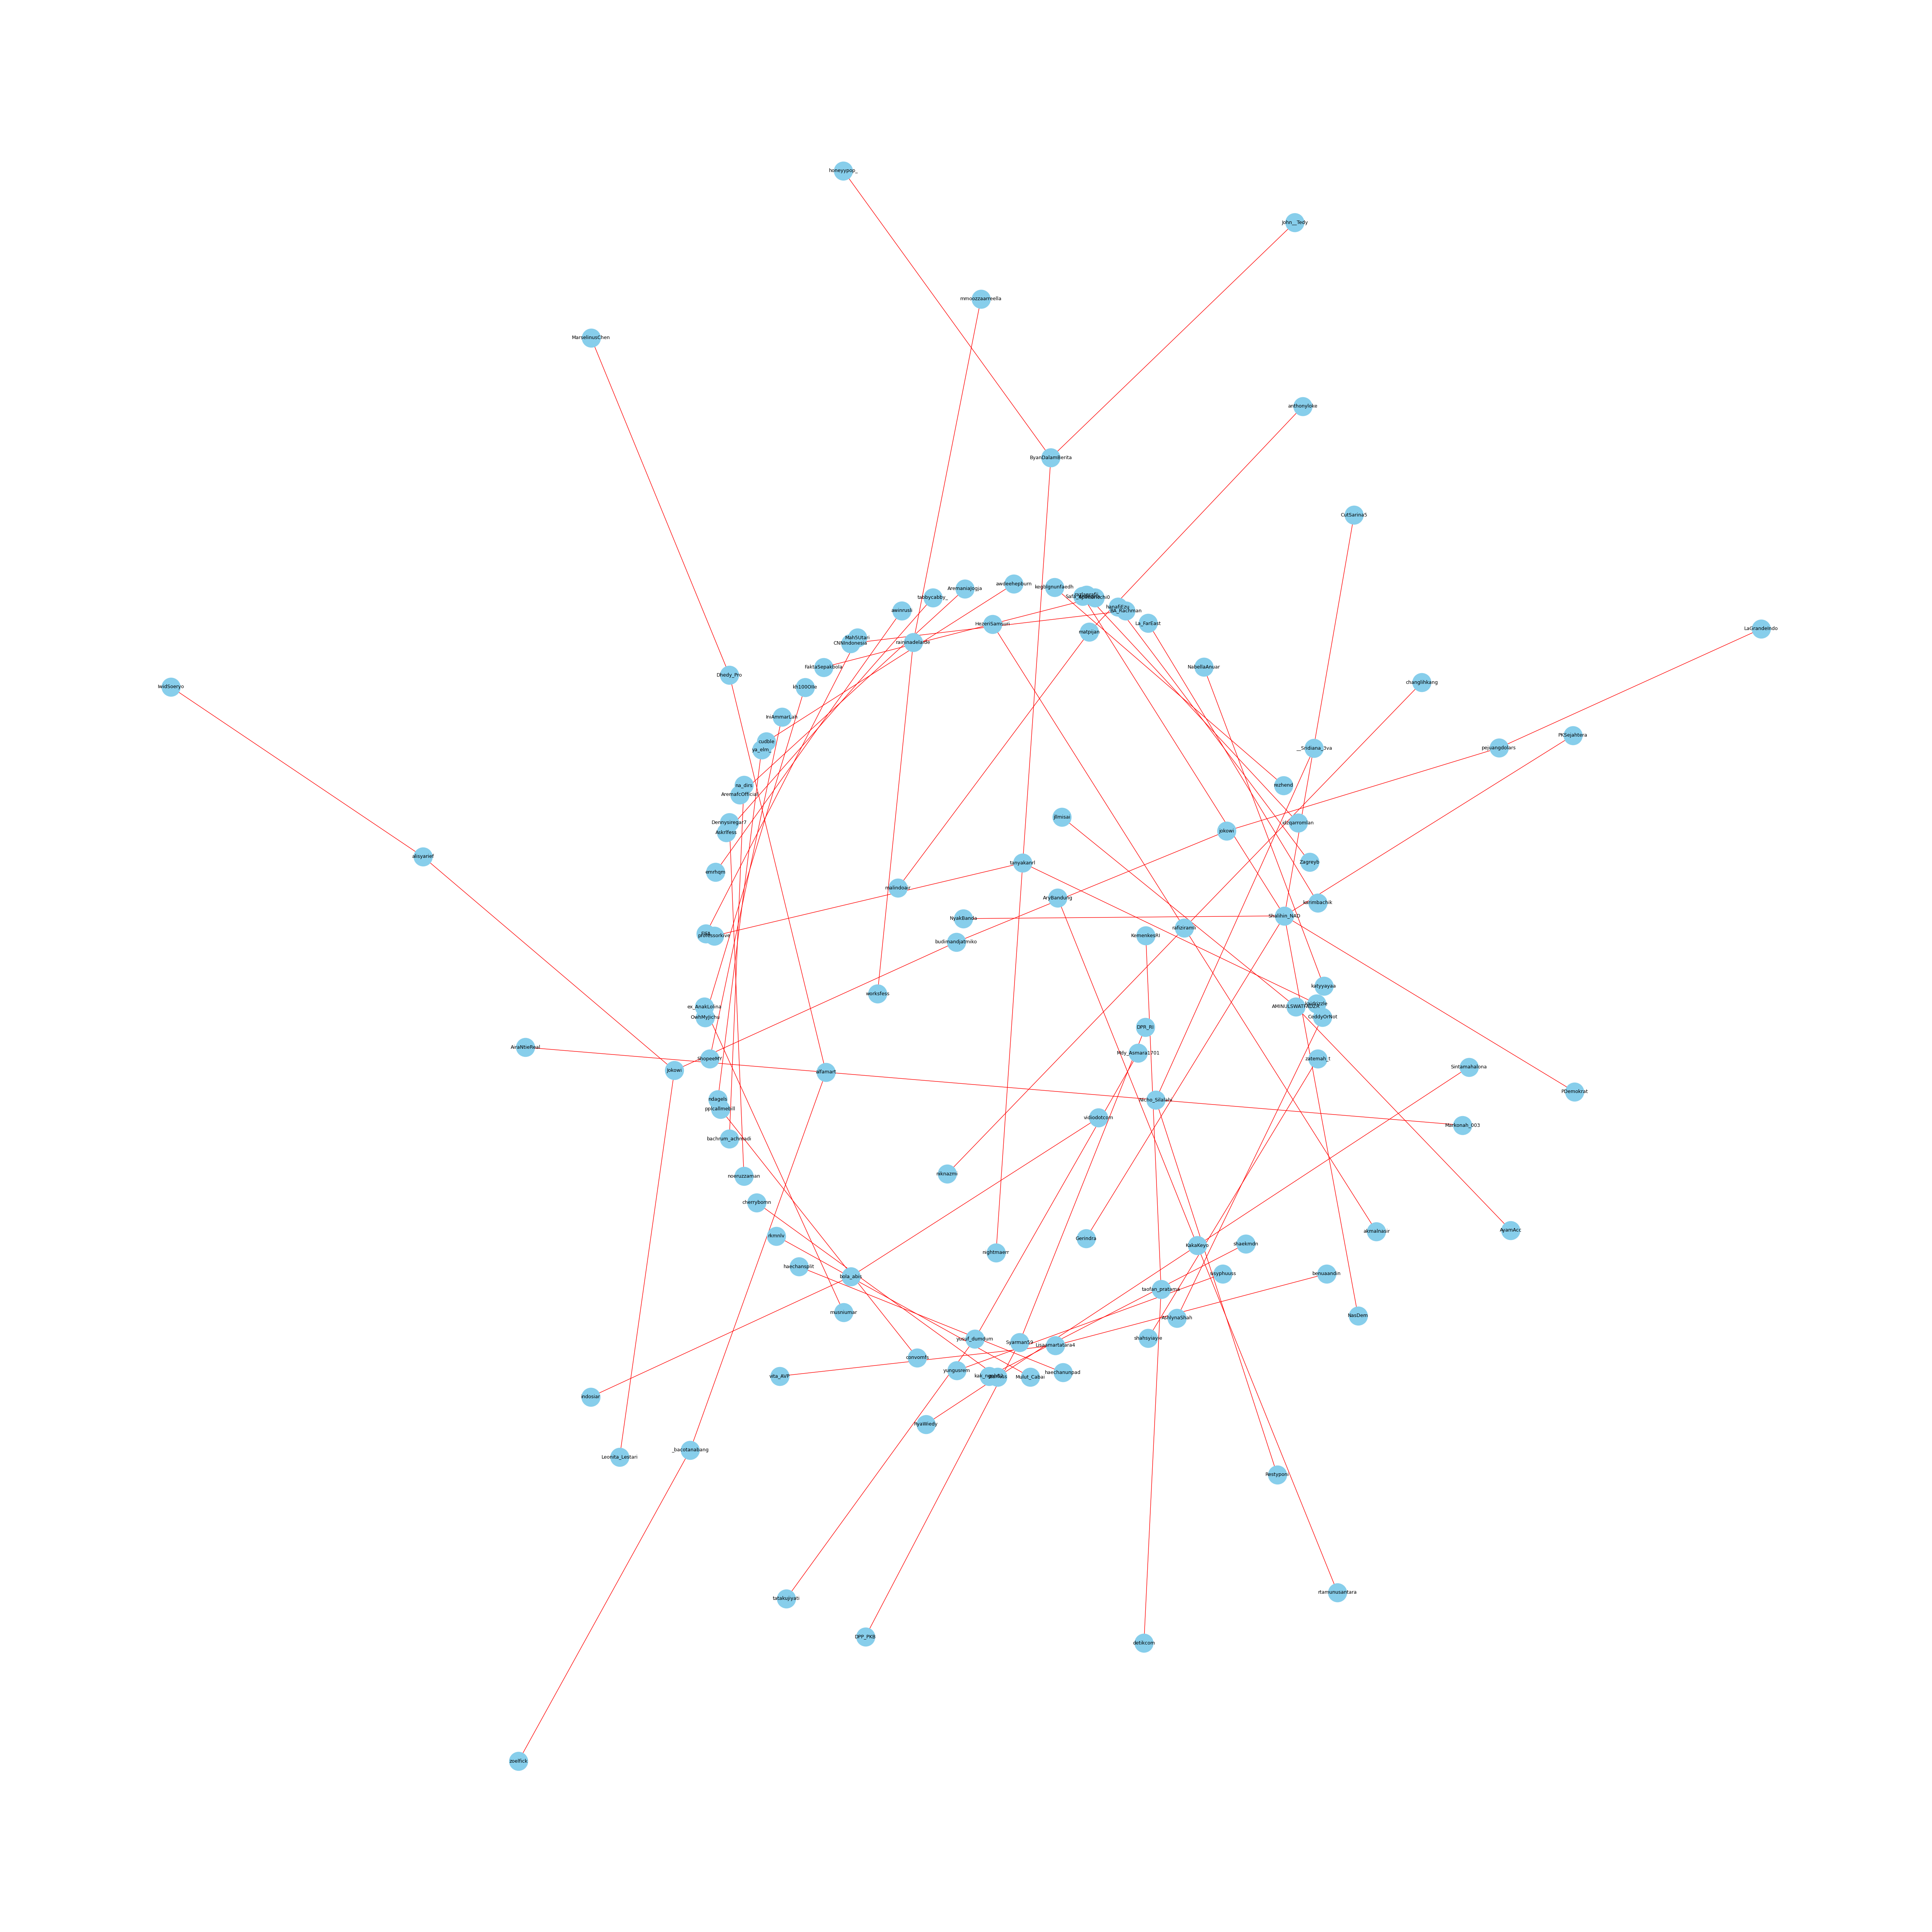

In [ ]:
# Visualize the Network
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
nx.draw(G1, with_labels=True,
        node_color='skyblue', node_size=1200,
        arrowstyle='->',arrowsize=20, edge_color='r',
        font_size=9,
        pos=nx.kamada_kawai_layout(G1))

**Network Metrics and Measurement**

a. Degree Centrality untuk melihar node/aktor yang paling populer dalam
network tersebut

In [ ]:
# Degree Centrality
degree = nx.degree_centrality(G1)

# Sorted from the Highest
sorted(nx.degree(G1), key=lambda x: x[1], reverse=True)[0:10]

[('Shalihin_NAD', 7),
 ('tanyakanrl', 4),
 ('rafiziramli', 4),
 ('alfamart', 4),
 ('Nicho_Silalahi', 4),
 ('KakaKeyo', 4),
 ('ByanDalamBerita', 3),
 ('Jokowi', 3),
 ('pejuangdolars', 2),
 ('jokowi', 2)]

Pada Degree Centrality, disorting 10 besar yang memiliki banyak
hubungan

b. Betweenness Centrality untuk melihat node/ aktor yang paling sering
mendapatkan informasi

In [ ]:
# Betweenness Centrality
betweenness = nx.betweenness_centrality(G1)

# Sorted from the Highest
sorted(nx.betweenness_centrality(G1, normalized=True).items(), key=lambda x:x[1], reverse=True)[0:10]

[('alfamart', 0.004056207446037954),
 ('Shalihin_NAD', 0.0030421555845284655),
 ('Nicho_Silalahi', 0.0030421555845284655),
 ('Jokowi', 0.002028103723018977),
 ('tanyakanrl', 0.0017383746197305518),
 ('budimandjatmiko', 0.0017383746197305518),
 ('jokowi', 0.0014486455164421266),
 ('ByanDalamBerita', 0.001303780964797914),
 ('Dhedy_Pro', 0.0011589164131537012),
 ('_bacotanabang', 0.0011589164131537012)]

Pada Betweeness Centrality, node yang paling sering mendapatkan informasi

c. Closeness Centrality untuk mengidentifikasi node-node yang paling
mengendalikan alur informasi

In [ ]:
# Closeness Centrality
closeness = nx.closeness_centrality(G1)

# Sorted from the Highest
sorted(nx.closeness_centrality(G1).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Shalihin_NAD', 0.059322033898305086),
 ('alfamart', 0.0490314769975787),
 ('Nicho_Silalahi', 0.04290254237288136),
 ('tanyakanrl', 0.038135593220338986),
 ('Dhedy_Pro', 0.034322033898305085),
 ('_bacotanabang', 0.034322033898305085),
 ('rafiziramli', 0.03389830508474576),
 ('ByanDalamBerita', 0.03389830508474576),
 ('KakaKeyo', 0.03389830508474576),
 ('Gerindra', 0.031942633637548894)]

Pada Closeness Centrality, mengidentifikasi orang-orang yang paling mengendalikan alur informasi

d. Eigenvector Centrality untuk melihat node yang paling berpengaruh dalam
network tersebut

In [ ]:
# Eigenvector Centrality
eigenvector = nx.eigenvector_centrality_numpy(G1)

# Sorted from the Highest
sorted(nx.eigenvector_centrality_numpy(G1).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Shalihin_NAD', 0.7071067811865475),
 ('PKSejahtera', 0.26726124191242445),
 ('Safa_Andriana', 0.26726124191242445),
 ('NyakBanda', 0.26726124191242445),
 ('NasDem', 0.2672612419124244),
 ('CutSarina5', 0.2672612419124244),
 ('PDemokrat', 0.26726124191242434),
 ('Gerindra', 0.2672612419124243),
 ('tanyakanrl', 8.592616963144328e-16),
 ('ByanDalamBerita', 6.609683234635709e-16)]

mengidentifikasi orang yang paling berpengaruh.

###**Visualize Network based on Centrality Measurement**

Cara untuk memvisualisasikan dan menganalisis
bagaimana node-node dalam jaringan tertentu memiliki pengaruh atau
kedudukan yang berbeda dalam jaringan tersebut. Sentralitas adalah salah
satu konsep penting dalam analisis jaringan sosial dan dapat membantu
dalam mengidentifikasi node-node yang paling penting atau berpengaruh
dalam jaringan.

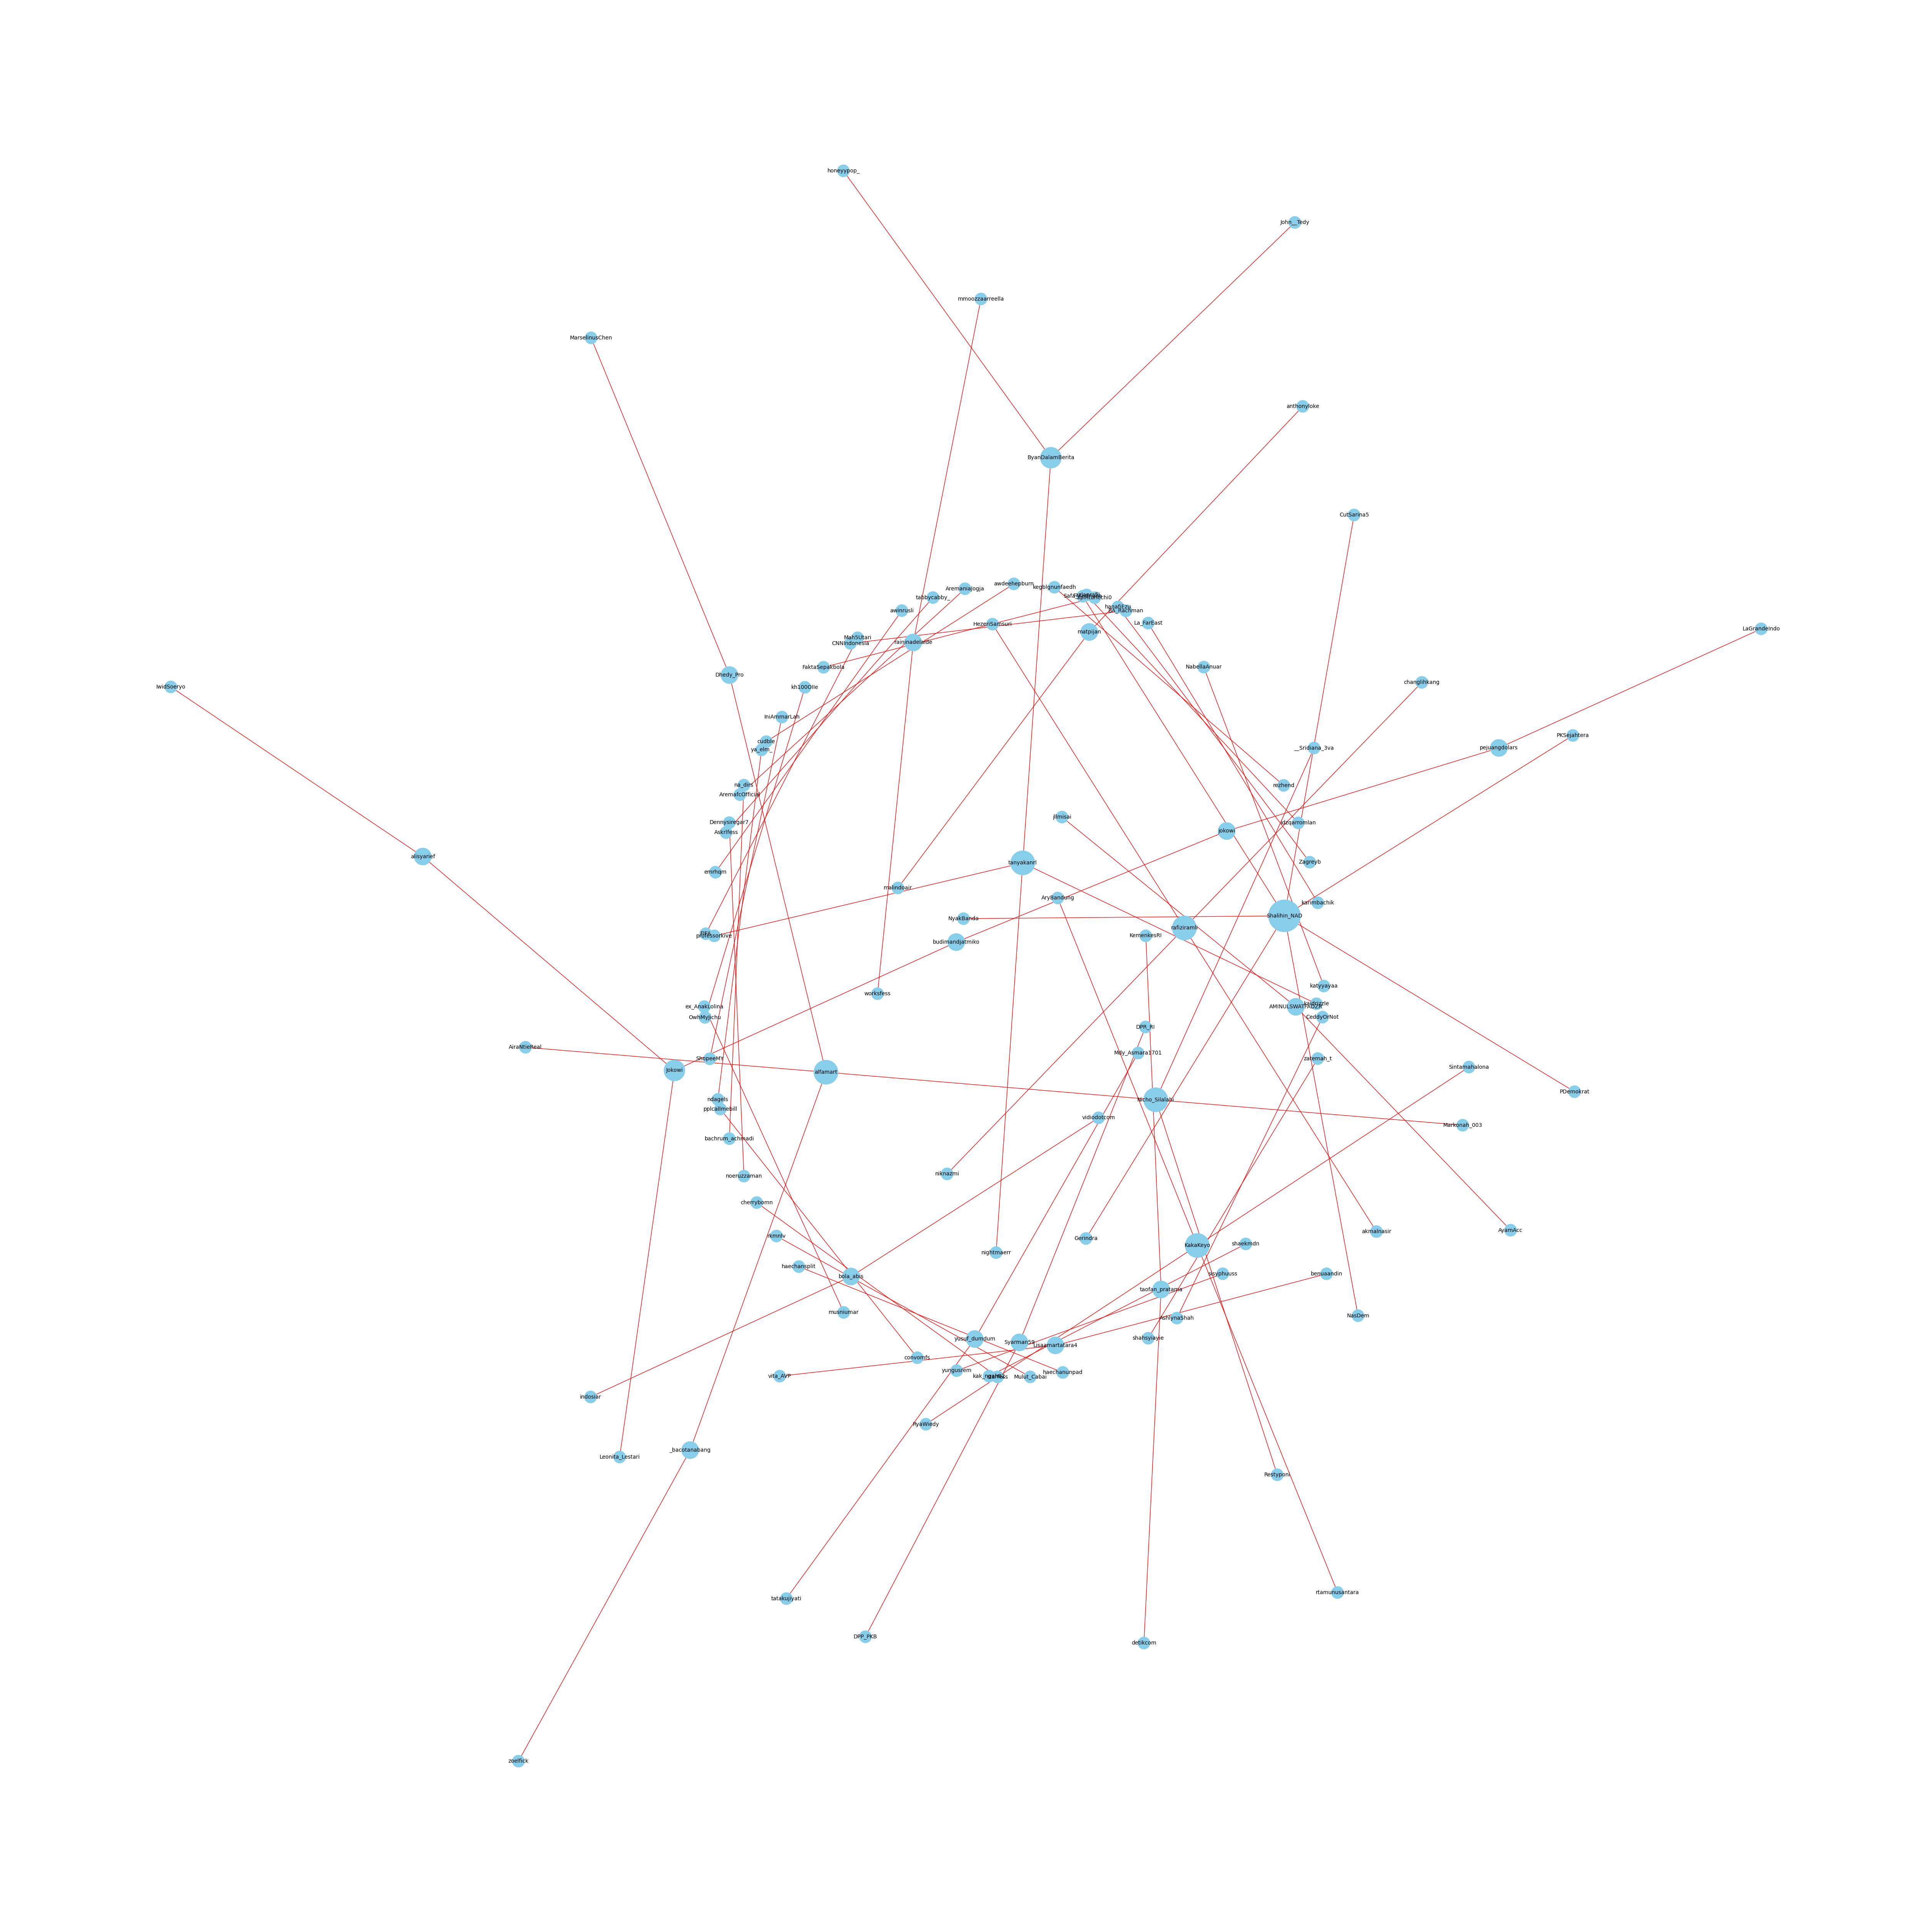

In [ ]:
# Set Degree Dictionary
d = dict(degree)

# Construct a Network
G1 = G1 = nx.from_pandas_edgelist(df_boikot, source='Source', target='Target')
# Visualize the Network
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 50))

# Convert dict_keys object to a list
nodelist = list(d.keys())

nx.draw(G1, with_labels=True,
        node_color='skyblue', nodelist=nodelist,
        node_size=[v * 60000 for v in d.values()],
        arrowstyle='->', arrowsize=20, edge_color='r',
        font_size=10,
        pos=nx.kamada_kawai_layout(G1))

plt.show()  # Don't forget to display the plot

###**Network Topology Measurement**

Melihat jumah Nodes dalam network

In [ ]:
# Show Number of Nodes
nx.number_of_nodes(G1)

119

Melihat jumlah Edges dalam network

In [ ]:
# Show Number of Edges
nx.number_of_edges(G1)

79

Melihat kerapatan data (graph density)

In [ ]:
# Show Graph Density
nx.density(G1)

0.011251958410482836

Melihat number of connecter component

In [ ]:
# Show Number of Connected Component
nx.number_connected_components(G1)

40

menampilkan jumlah komponen terhubung

### **Community Detection**

Dalam community detection, tujuannya adalah untuk membagi jaringan ke dalam daerah-daerah pada graph. Daerah tersebut biasanya sesuai dengan entitas-entitas yang memiliki
hubungan erat, dan dapat dikatakan sebagai satu komunitas.

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

In [ ]:
print(nx.__version__)

3.2.1


In [ ]:
communities_m = sorted(greedy_modularity_communities(G1), key=len, reverse=True)
communities_m

[frozenset({'AiraNtieReal',
            'Dhedy_Pro',
            'Markonah_003',
            'MarselinusChen',
            'Nicho_Silalahi',
            'Restyponi',
            '__Sridiana_3va',
            '_bacotanabang',
            'alfamart',
            'zoelfick'}),
 frozenset({'CutSarina5',
            'Gerindra',
            'NasDem',
            'NyakBanda',
            'PDemokrat',
            'PKSejahtera',
            'Safa_Andriana',
            'Shalihin_NAD'}),
 frozenset({'IwidSoeryo',
            'Jokowi',
            'LaGrandeIndo',
            'Leonita_Lestari',
            'alisyarief',
            'budimandjatmiko',
            'jokowi',
            'pejuangdolars'}),
 frozenset({'ByanDalamBerita',
            'John__Tedy',
            'honeyypop_',
            'kaidrizzle',
            'nightmaerr',
            'professorkive',
            'tanyakanrl'}),
 frozenset({'HezeriSamsuri',
            'akmalnasir',
            'changlihkang',
            'niknazmi',
 